# Importing libraries

In [1]:
#%config IPCompleter.greedy=True

In [2]:
#pip install pandas_datareader

In [3]:
#pip install --upgrade pandas-datareader

In [4]:
#pip install yfinance

In [5]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import pandas_datareader as data #importing this library because I want to scrap the data from web
import yfinance as yf

In [6]:
start = '2000-01-01'
end = '2019-12-31'

df = yf.download('AAPL', start=start, end=end)
#df = yf.DataReader('AAPL', start=start, end=end)

print(df.head())

[*********************100%%**********************]  1 of 1 completed

                Open      High       Low     Close  Adj Close     Volume
Date                                                                    
2000-01-03  0.936384  1.004464  0.907924  0.999442   0.846127  535796800
2000-01-04  0.966518  0.987723  0.903460  0.915179   0.774790  512377600
2000-01-05  0.926339  0.987165  0.919643  0.928571   0.786128  778321600
2000-01-06  0.947545  0.955357  0.848214  0.848214   0.718098  767972800
2000-01-07  0.861607  0.901786  0.852679  0.888393   0.752113  460734400


# Reseting my index

In [7]:
df = df.reset_index()
df.head

<bound method NDFrame.head of            Date       Open       High        Low      Close  Adj Close  \
0    2000-01-03   0.936384   1.004464   0.907924   0.999442   0.846127   
1    2000-01-04   0.966518   0.987723   0.903460   0.915179   0.774790   
2    2000-01-05   0.926339   0.987165   0.919643   0.928571   0.786128   
3    2000-01-06   0.947545   0.955357   0.848214   0.848214   0.718098   
4    2000-01-07   0.861607   0.901786   0.852679   0.888393   0.752113   
...         ...        ...        ...        ...        ...        ...   
5025 2019-12-23  70.132500  71.062500  70.092499  71.000000  69.082329   
5026 2019-12-24  71.172501  71.222504  70.730003  71.067497  69.148003   
5027 2019-12-26  71.205002  72.495003  71.175003  72.477501  70.519913   
5028 2019-12-27  72.779999  73.492500  72.029999  72.449997  70.493141   
5029 2019-12-30  72.364998  73.172501  71.305000  72.879997  70.911545   

         Volume  
0     535796800  
1     512377600  
2     778321600  
3     767

# Droping not required columns

In [8]:

df = df.drop(['Date','Adj Close'], axis = True)
df.head()

,Open,High,Low,Close,Volume
0,0.936384,1.004464,0.907924,0.999442,535796800
1,0.966518,0.987723,0.903460,0.915179,512377600
2,0.926339,0.987165,0.919643,0.928571,778321600
3,0.947545,0.955357,0.848214,0.848214,767972800
4,0.861607,0.901786,0.852679,0.888393,460734400


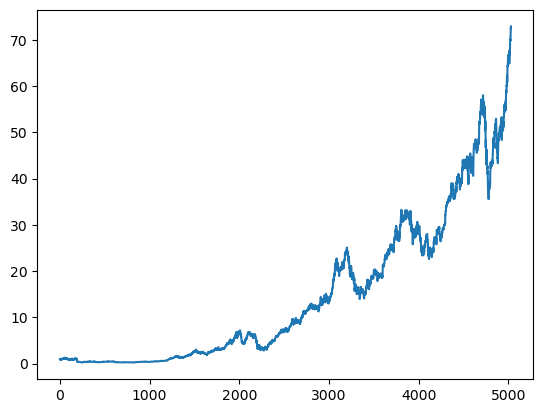

In [9]:
plt.plot(df.Close)

# Moving Average of 100 days

In [10]:
ma100 = df.Close.rolling(100).mean()
ma100

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
5025    59.201075
5026    59.401700
5027    59.643125
5028    59.875125
5029    60.106325
Name: Close, Length: 5030, dtype: float64

# 100 days moving average graph

Text(0, 0.5, 'Stock Close Price')

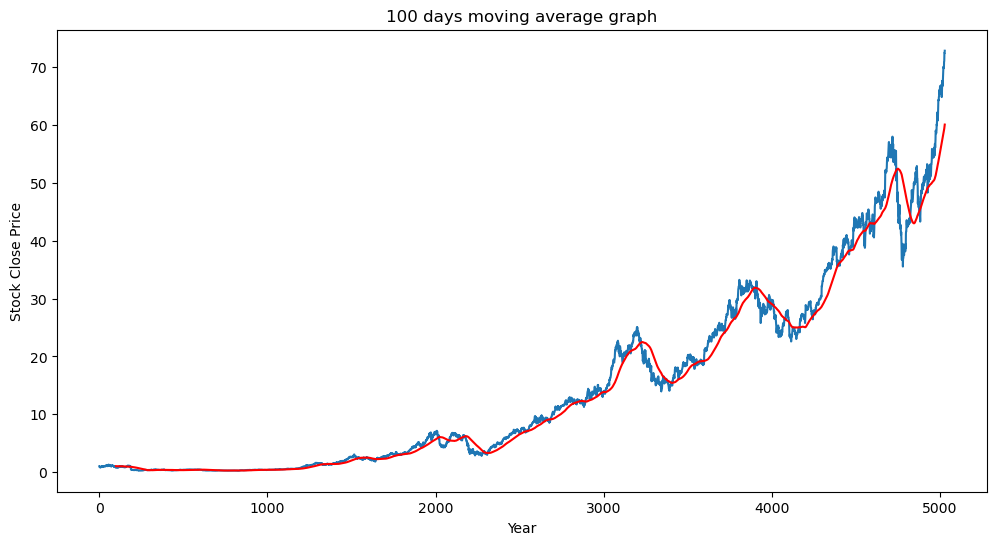

In [11]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

plt.title("100 days moving average graph")
plt.xlabel("Year")
plt.ylabel("Stock Close Price")

# Moving Average of 200 days

In [12]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
5025    54.132313
5026    54.261513
5027    54.396763
5028    54.529350
5029    54.661100
Name: Close, Length: 5030, dtype: float64

# 200 days moving average graph

Text(0, 0.5, 'Stock Close Price')

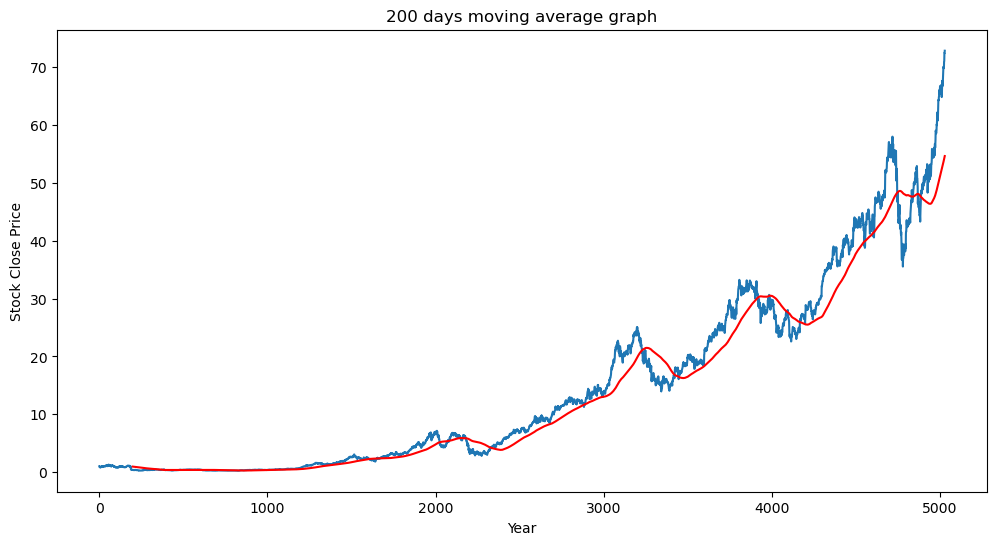

In [13]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma200,'r')

plt.title("200 days moving average graph")
plt.xlabel("Year")
plt.ylabel("Stock Close Price")

# 100 and 200 days moving average graph

Text(0, 0.5, 'Stock Close Price')

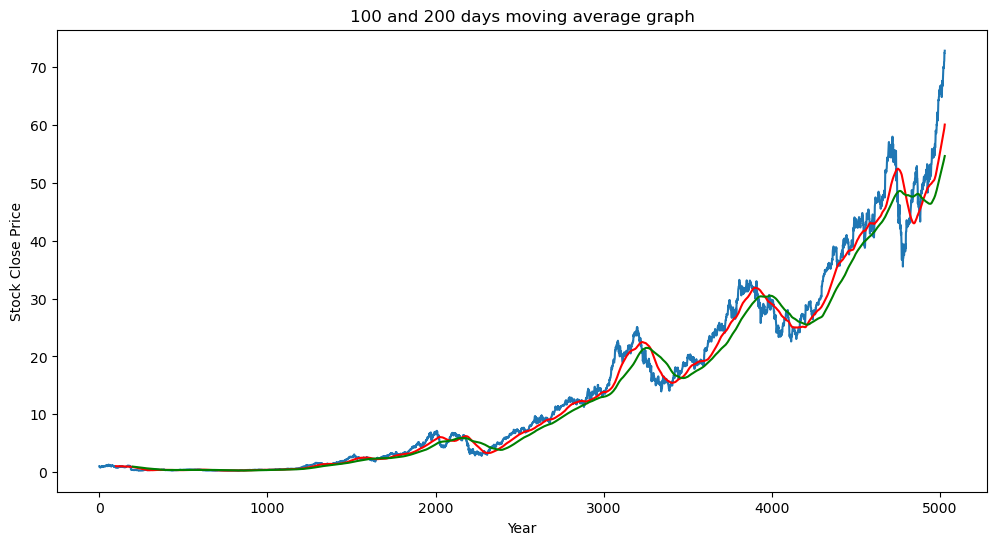

In [14]:

plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

plt.title("100 and 200 days moving average graph")
plt.xlabel("Year")
plt.ylabel("Stock Close Price")

In [15]:
df.shape

(5030, 5)

# Splitting data into training and testing

In [16]:
#Spliting the data into train and test
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(3521, 1)
(1509, 1)


In [17]:
print(data_training.head())
print(data_testing.head())

      Close
0  0.999442
1  0.915179
2  0.928571
3  0.848214
4  0.888393
          Close
3521  19.754642
3522  19.320715
3523  19.426071
3524  19.287144
3525  19.409286


# Scaling Down the data to 0 and 1 

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [19]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.03080249],
       [0.02741036],
       [0.02794948],
       ...,
       [0.79582766],
       [0.78781948],
       [0.79716476]])

# Defineing X_train and y_train

In [20]:
data_training_array.shape

(3521, 1)

In [21]:
x_train = []
y_train = []

for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i, 0])
    


# converting x_train and y_train to numpy array so that we can provide this data to our model

In [22]:
x_train , y_train = np.array(x_train), np.array(y_train)

# ML Model

In [23]:
#pip install keras

In [24]:
#!pip install tensorflow


In [25]:
x_train.shape

(3421, 100, 1)

In [26]:
from keras.layers import Dense , Dropout, LSTM
from keras.models import Sequential

In [27]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
              input_shape = (x_train.shape[1],1)))

model.add(Dropout(0.2))

##################################################################################


model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))

model.add(Dropout(0.3))

####################################################################################

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))

model.add(Dropout(0.4))

#################################################################################


model.add(LSTM(units = 120, activation = 'relu'))

model.add(Dropout(0.5))

###################################################################################

#Dence Layer
model.add(Dense(units = 1))


C:\Users\B Das\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [28]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 37s 243ms/step - loss: 0.0374
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 37s 204ms/step - loss: 0.0041
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 22s 209ms/step - loss: 0.0033
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 22s 205ms/step - loss: 0.0034
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 22s 204ms/step - loss: 0.0032
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 22s 204ms/step - loss: 0.0030
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 22s 202ms/step - loss: 0.0036
Epoch 8/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 25s 233ms/step - loss: 0.0028
Epoch 9/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 40s 224ms/step - loss: 0.0025
Epoch 10/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 22s 208ms/step - loss: 0.0027
Epoch 11/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 22s 204ms/step - loss: 0.0023
Epoch 12/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 22s 209ms/step - loss: 0.0026
Epoch 13/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 23s 215ms/step - loss: 0.0024
Epoch 14/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 23s 211ms/step - loss: 0.0023
Epoch 15/50
107

# Saving the model

In [31]:
model.save('keras_model.h5')

# prediction

In [33]:
data_testing.head()

,Close
3521,19.754642
3522,19.320715
3523,19.426071
3524,19.287144
3525,19.409286


In [34]:
data_training.tail()

,Close
3516,20.273930
3517,20.139286
3518,20.003214
3519,19.804285
3520,20.036428


In [35]:
past_100_days = data_training.tail(100)

In [36]:
final_df = past_100_days.append(data_testing, ignore_index = True)

C:\Users\B Das\AppData\Local\Temp\ipykernel_12520\3299050086.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_testing, ignore_index = True)


In [37]:
final_df.head()

,Close
0,16.230356
1,16.691429
2,17.484644
3,17.803572
4,17.782499


In [38]:
input_data = scaler.fit_transform(final_df)
input_data


array([[0.00272237],
       [0.01083924],
       [0.02480323],
       ...,
       [0.99291433],
       [0.99243014],
       [1.        ]])

In [39]:
input_data.shape

(1609, 1)

In [40]:
x_test = []
y_test = []

########################################
for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [43]:
x_test, y_test = np.array(x_test), np.array(y_test)

print(x_test.shape)
print(y_test.shape)

(1509, 100, 1)
(1509,)


# Making Prediction

In [44]:
y_predicted = model.predict(x_test)

48/48 ━━━━━━━━━━━━━━━━━━━━ 6s 98ms/step


In [45]:
y_predicted.shape

(1509, 1)

In [46]:
y_test

array([0.06476498, 0.05712599, 0.05898071, ..., 0.99291433, 0.99243014,
       1.        ])

In [47]:
y_predicted

array([[0.09205254],
       [0.09248951],
       [0.09286252],
       ...,
       [0.80496204],
       [0.80994546],
       [0.81509376]], dtype=float32)

In [48]:
scaler = scaler.scale_

array([0.01760431])

# again rolling back to my original value to get the clear output 

In [49]:
scale_factor = 1/0.01760431
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor


# Ploting the predicted and original values

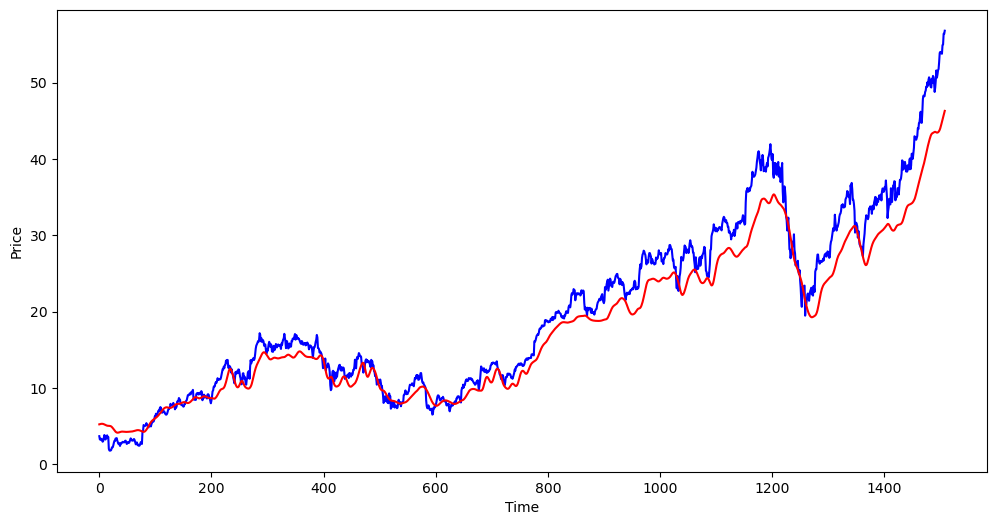

In [50]:
plt.figure(figsize =(12,6))
plt.plot(y_test, 'b',label = "Original Price")
plt.plot(y_predicted, 'r',label = "Predicted Price")

plt.xlabel('Time')
plt.ylabel('Price')
plt.legend
plt.show()